# Electric-cars-taxation

This is a Jupyter Notebook for creating insights about the taxation around cars.

## Preprocessing

First we'll get some data from the Statistics of Finland. We start by fetching amounts of newly registered regular gasoline cars.

In [27]:
import numpy as np

from requests import post
import pandas as pd

from utils import create_year_list, json_to_text

year_list = create_year_list(1990, 2023)
year_list = list(year_list)

TARGET = './data_files'
# all the relevant data is saved here and gitignored

from sf_queries import newly_registered_cars_json


cars_newly_registered_90_05 = post('https://pxdata.stat.fi:443/PxWeb/api/v1/fi/StatFin/merek/statfin_merek_pxt_11ck.px',
                 json=newly_registered_cars_json)
# site url: https://pxdata.stat.fi/PxWeb/pxweb/fi/StatFin/StatFin__merek/statfin_merek_pxt_11ck.px/

if cars_newly_registered_90_05:
    cars_newly_registered_90_05 = cars_newly_registered_90_05.json()

    dest = f'{TARGET}/car_amounts_json.json'

    json_to_text(cars_newly_registered_90_05, dest)
    # read json retrieved from sf to text file to analyze the data to make dataframe efficiently

    years = list(cars_newly_registered_90_05['dimension']['Vuosi']['category']['label'].values())
    amounts = cars_newly_registered_90_05['value']

    e_and_motor_cars = np.array(amounts).reshape(2, 34)

    registered_df = pd.DataFrame({'Year': years,
                                  'Gasoline-cars': e_and_motor_cars[0],
                                  'E-cars': e_and_motor_cars[1]})
    print(registered_df)

JSON data has been successfully written to ./data_files/car_amounts_json.json
    Year  Gasoline-cars  E-cars
0   1990         131830       0
1   1991          87997       2
2   1992          65095       1
3   1993          51465       0
4   1994          63455       0
5   1995          74386       0
6   1996          82878       2
7   1997          89225       0
8   1998         106025       0
9   1999         114295       3
10  2000         108273       0
11  2001          91412       0
12  2002          98837       0
13  2003         125042       0
14  2004         120536       0
15  2005         123020       0
16  2006         116128       0
17  2007          89797       0
18  2008          70317       5
19  2009          48531       1
20  2010          64822      15
21  2011          72128      30
22  2012          66821      51
23  2013          64195      50
24  2014          63969     183
25  2015          69070     243
26  2016          77927     223
27  2017          79034   

Next we make simple arrow diagram for plotting the data retrieved using seaborn.  

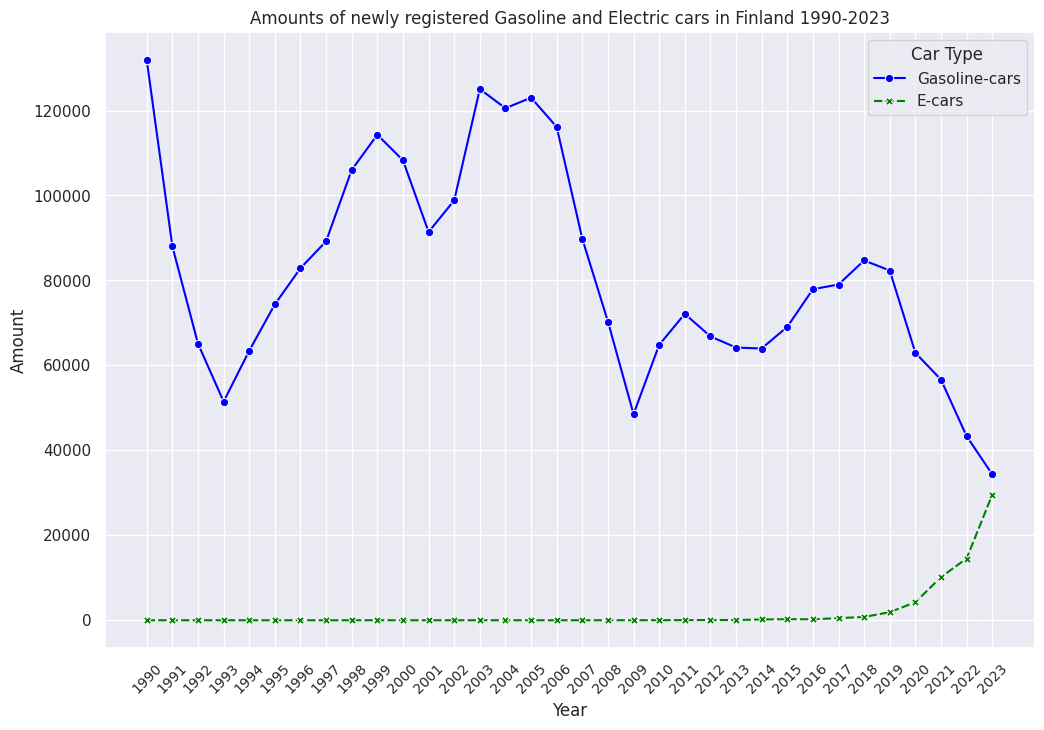

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

registered_long_df = pd.melt(registered_df, id_vars='Year',
                             value_vars=['Gasoline-cars', 'E-cars'],
                             var_name='Car Type', value_name='Amount')

sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 8))

e_and_gasoline_lines = sns.lineplot(x='Year', y='Amount', hue='Car Type', data=registered_long_df,
             markers=True, style='Car Type', palette=['blue', 'green'])

plt.xticks(rotation=45, fontsize=10)

plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Amounts of newly registered Gasoline and Electric cars in Finland 1990-2023')

plt.show()


JSON data has been successfully written to ./data_files/car_taxes_json.json
    Year  Tax amount (mil)
0   1990               140
1   1991               145
2   1992               137
3   1993               148
4   1994               246
5   1995               288
6   1996               343
7   1997               354
8   1998               376
9   1999               395
10  2000               400
11  2001               436
12  2002               451
13  2003               473
14  2004               642
15  2005               537
16  2006               568
17  2007               612
18  2008               637
19  2009               655
20  2010               691
21  2011               759
22  2012               758
23  2013               866
24  2014               877
25  2015               930
26  2016              1083
27  2017              1169
28  2018              1194
29  2019              1150
30  2020              1168
31  2021              1134
32  2022              1109
33  20

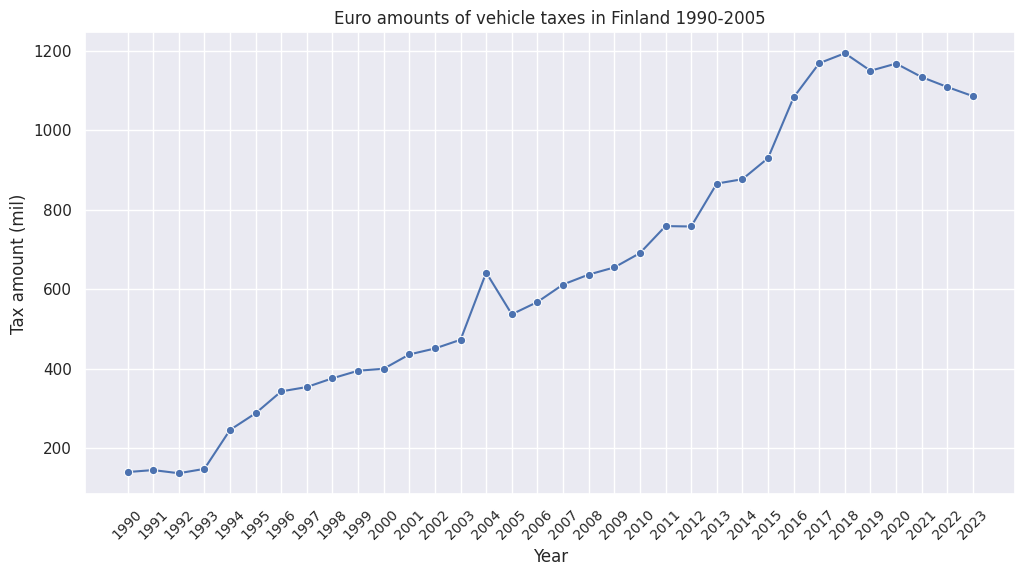

In [29]:

from sf_queries import car_tax_json

car_taxes = post('https://statfin.stat.fi:443/PxWeb/api/v1/fi/StatFin/vermak/statfin_vermak_pxt_127f.px',
                 json=car_tax_json)

if car_taxes:
    car_taxes = car_taxes.json()

    dest = f'{TARGET}/car_taxes_json.json'

    json_to_text(car_taxes, dest)
    # read json retrieved from sf to text file to analyze the data to make dataframe efficiently

    years = list(car_taxes['dimension']['Vuosi']['category']['label'].values())
    amounts = car_taxes['value']

    from_row_vector_to_two_d = np.array(amounts).reshape(2, 34)

    sum_of_taxes = np.sum(from_row_vector_to_two_d, axis=0)

    taxes_df = pd.DataFrame({'Year': years,
                       'Tax amount (mil)': sum_of_taxes})
    print(taxes_df)

    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(12, 6))

    sns.lineplot(x='Year', y='Tax amount (mil)', data=taxes_df, marker='o')

    plt.xticks(rotation=45, fontsize=10)

    plt.xlabel('Year')
    plt.ylabel('Tax amount (mil)')
    plt.title('Euro amounts of vehicle taxes in Finland 1990-2005')

    plt.show()

Combination of the charts:

/tmp/ipykernel_32332/212830983.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


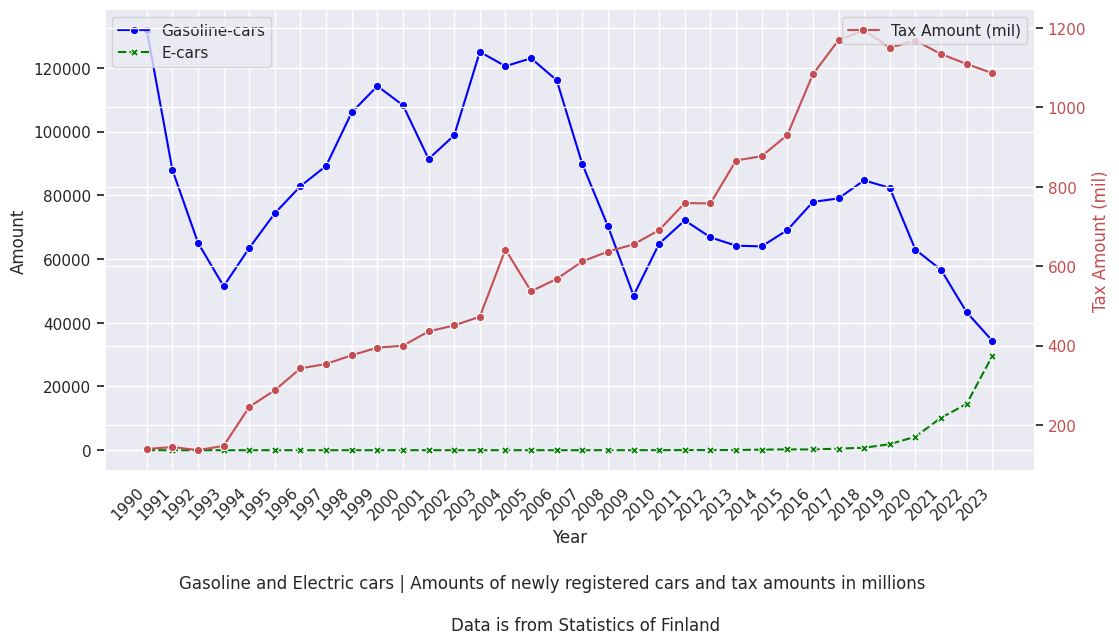

In [56]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(12, 6))

ax1 = plt.gca()
sns.lineplot(x='Year', y='Amount', hue='Car Type', data=registered_long_df,
             markers=True, style='Car Type', palette=['blue', 'green'], ax=ax1)

ax1.set_xlabel('Year')
ax1.set_ylabel('Amount')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
sns.lineplot(x='Year', y='Tax amount (mil)', data=taxes_df, marker='o', ax=ax2, color='r', label='Tax Amount (mil)')
ax2.set_ylabel('Tax Amount (mil)', color='r')
ax2.tick_params(axis='y', labelcolor='r')


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


plt.figtext(0.5, -0.15,'''Gasoline and Electric cars | Amounts of newly registered cars and tax amounts in millions \n
            Data is from Statistics of Finland''',
            wrap=True, horizontalalignment='center', fontsize=12)

plt.show()